1. Visualize the time series
2. Stationarize time series
3. Plot ACF/PACF for optimal parameters
4. Build the ARIMA model
5. Buils GARCH model
6. Prediction

In [1]:
import os
import sys
# data transforamtion and manipulation
import pandas as pd
import pandas_datareader.data as web
import numpy as np

# statistical modeling libraries
from statsmodels.tsa.seasonal import seasonal_decompose
# statistical modeling libraries
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
#from arch import arch_model
from arch import arch_model

# plotting and plot stying
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
#%load_ext autoreload
#%autoreload 2
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
#plt.style.use('seaborn')

# basic functionalities
import re
import os
import sys
import datetime
import itertools
import math 

# data transforamtion and manipulation
import pandas as pd
import pandas_datareader.data as web
import numpy as np
# prevent crazy long pandas prints
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)


# remove warnings
import warnings
warnings.filterwarnings('ignore')


# jupyter wdgets
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image

# prevent crazy long pandas prints
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)


# remove warnings
import warnings
warnings.filterwarnings('ignore')

# prevent crazy long pandas prints
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)


# remove warnings
import warnings
warnings.filterwarnings('ignore')

#plt.style.use('seaborn')
#sns.set_style("whitegrid", {'axes.grid' : False})
#set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 120
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"

# jupyter theme overrides
from jupyterthemes import jtplot
# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='chesterish')
# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

plt.rcParams['image.cmap'] = 'jet'
# recet to matplotlib standards
#jtplot.reset()

/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import processing
import ds
import ml
import model_saving
import TS

Using TensorFlow backend.


In [3]:
p = print
p('Machine: {} {}\n'.format(os.uname().sysname,os.uname().machine))
p(sys.version)

Machine: Linux x86_64

3.5.2 | packaged by conda-forge | (default, Jul 26 2016, 01:32:08) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


In [4]:
filename = '/home/octo/Dropbox'+ '/SPY29Dec.csv'

In [5]:
data=processing.get_csv_pd(filename)
data=processing.BA(data)
data=processing.preprocessing(data)
data_km=ml.kalman_ma(data)
data['km']=data_km
data['diff']=np.where(np.logical_and(data.Open>data.km,data.spread>0),data.vwap-data.km,np.where(np.logical_and(data.Open<data.km,data.spread<0),data.vwap-data.km,0))

In [6]:
data_arima=np.log(data.Close).diff().diff(15)

# 1. Visulisation

### Stationarity
Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

constant mean
constant variance
an autocovariance that does not depend on time.

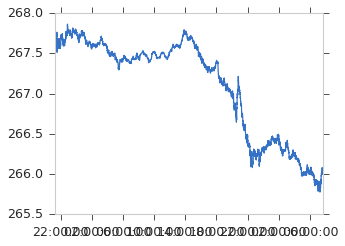

In [8]:
import numpy as np
X = data.Close.astype('float32')
import matplotlib.pyplot as plt
plt.plot(X)
plt.show()

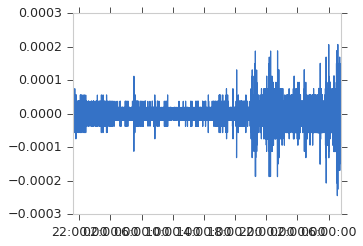

In [7]:
# log double difference
import numpy as np
X = data_arima.astype('float32')
import matplotlib.pyplot as plt
plt.plot(X)
plt.show()

In [9]:
data_arima=data_arima[5000:22000]

In [10]:
%matplotlib inline
import os.path
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import statsmodels.api as sm
import statsmodels.tsa.api as smt

from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use('ggplot')

In [11]:
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
import pandas as pd 

In [12]:
predict_time = 5

In [13]:
split = len(data_arima) - predict_time
train_data, prediction_data = data_arima[0:split],data_arima[split:]
train_data.tail(5)

2017-12-30 01:34:21.983155   -0.00006
2017-12-30 01:34:23.122215    0.00000
2017-12-30 01:34:24.243357   -0.00002
2017-12-30 01:34:25.488592    0.00000
2017-12-30 01:34:26.763723    0.00000
Name: Close, dtype: float32

In [14]:
prediction_data

2017-12-30 01:34:28.020868   0.00000
2017-12-30 01:34:29.601923   0.00000
2017-12-30 01:34:31.595303   0.00000
2017-12-30 01:34:33.393180   0.00000
2017-12-30 01:34:34.995944   0.00000
Name: Close, dtype: float32

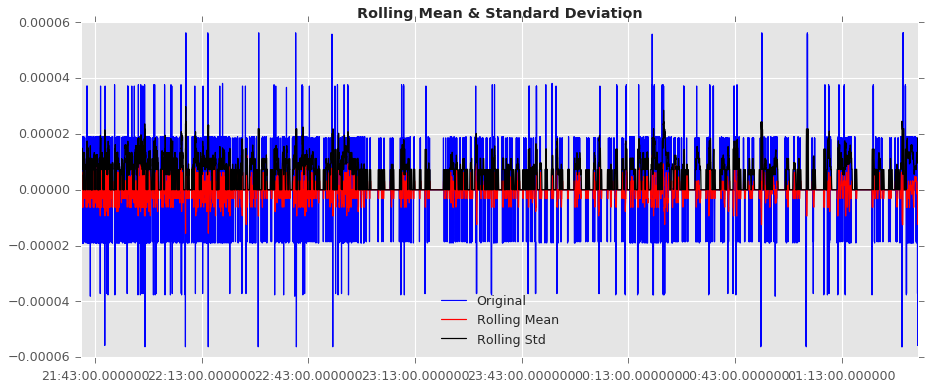

Results of Dickey-Fuller Test:
Test Statistic                  -32.95184
p-value                           0.00000
#Lags Used                       44.00000
Number of Observations Used   16955.00000
Critical Value (10%)             -2.56686
Critical Value (1%)              -3.43074
Critical Value (5%)              -2.86171
dtype: float64


In [15]:
rcParams['figure.figsize'] = 15, 6
TS.test_stationarity(data_arima)
plt.show()

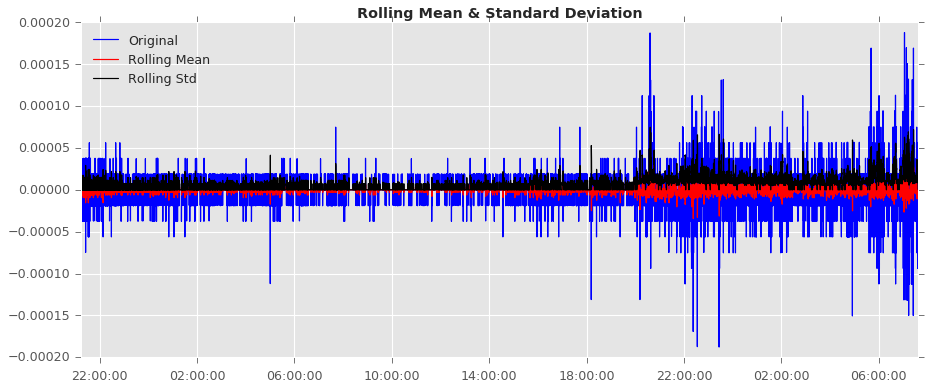

Results of Dickey-Fuller Test:
Test Statistic                  -35.37453
p-value                           0.00000
#Lags Used                       46.00000
Number of Observations Used   65316.00000
Critical Value (10%)             -2.56679
Critical Value (1%)              -3.43045
Critical Value (5%)              -2.86158
dtype: float64


In [20]:
rcParams['figure.figsize'] = 15, 6
TS.test_stationarity(np.log(data.Close).diff(1).dropna())
plt.show()

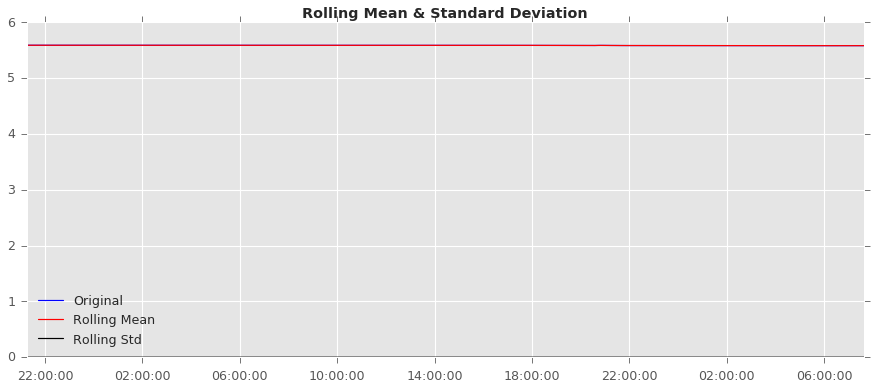

Results of Dickey-Fuller Test:
Test Statistic                    0.66340
p-value                           0.98908
#Lags Used                       47.00000
Number of Observations Used   65316.00000
Critical Value (10%)             -2.56679
Critical Value (1%)              -3.43045
Critical Value (5%)              -2.86158
dtype: float64


In [17]:
rcParams['figure.figsize'] = 15, 6
TS.test_stationarity(np.log(data.Close))
plt.show()

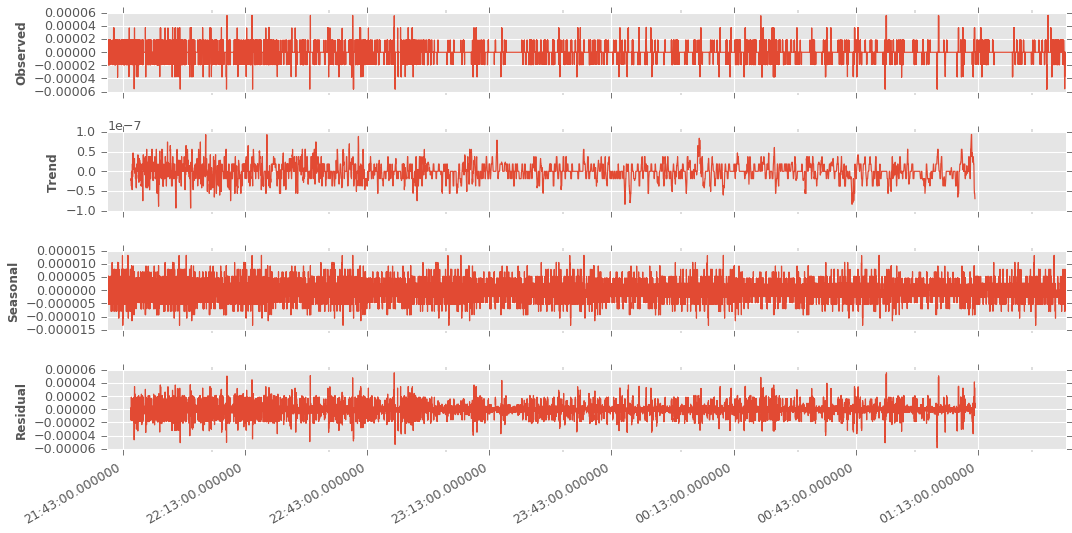

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_arima, freq=2000)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)
plt.show()

In [25]:
trend = decomposition.trend
seasonal = decomposition.seasonal 
#residual = decomposition.res 

# 2. Time Series Basics

A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. - <a href="https://en.wikipedia.org/wiki/Time_series">Wikipedia</a>

## 2.1 Data generating process

A time series is a sequence of observations $y_1, \dots, y_T$ which are equally spaced along a time axis according to a frequency of observation (e.g. daily, monthly, yearly, etc). 

An observed time series, denoted $\{y_t\}_{t=1}^{T}$, is assumed to stem from an unobservable <strong>data generating process</strong>.

A parametric modelling approach to time series analysis makes the fundamental assumption that the underlying data generating process is a <strong>stationary stochastic process</strong>. That is, the process has a certain structure which can be described by using a number of parameters (e.g autoregressive or moving average models).

## 2.2 Concept of stationarity
A stochastic process $\{y_t\}_{t=1}^{T}$ is called strongly stationary if the distribution of $\{y_{t+s}\}_{t=1}^{T}$ for $s \in T$ is exactly the same as the distribution of $\{y_t\}_{t=1}^{T}$. In other words, the distribution of original time-series is exactly same as lagged time series (by any number of lags) or even sub segments of the time series. This assumption is to strict and absolutely not applicable to time series encountered in real life.

A milder assumption is <strong>covariance stationarity</strong>. A process $\{y_t\}_{t=1}^{T}$ is covariance stationary if:
<ol>
<li>$ E[y_t] = \mu < \infty $ for all $t$</li>
<li>$ V[y_t] = \sigma^2 < \infty $ for all $t$</li>
<li>$ \gamma(t, s) = \gamma[\tau] < \infty $ for all $t$ and $\tau$</li>
</ol>

In [ ]:
Image(filename=('stationarity.png'))

## 2.3 Serial Correlation (Autocorrelation)

<strong>Autocovariance</strong> describes the covariance between two values of a stochastic process $\{y_t\}_{t=1}^T$ at different points in time:

$$
\gamma(t, s) = Cov(y_t, y_s) = E[(y_t - \mu_t)(y_s - \mu_s)]
$$

Then, the <strong>autocarrelation function</strong> is given by

$$
\rho(t, s) = \frac{\gamma(t, s)}{\sigma_t\sigma_s}
$$

with $-1 < \rho(t, s) < +1$ and where $\sigma$ is the standard deviation. This is the formalization of the third requirement of a stationary time series. Thus, when the residuals (errors) in a time series are correlated with each other it is said to exhibit <strong>serial correlation</strong>. For a stationary process the covariance is only dependent on the difference $\tau$ between $t$ and $s$.

The autocorrrelation is the processes autocovariance normalized by the standard deviation. Thus, the Autocorrelation is a better measurement for the dependency structure, because the autocovariacne will be affected by the underlying units of measurement for the observation. The autocovariance in some cases will not necessarily give an indication/intuition how strong the observations are connected with each other

To get a better grasp of the serial correlation within a time series the <strong>Scatter Plot</strong> can be used. This is plotting the series against its past.

In [ ]:
ncols = 3
nrows = 3
lags = 9

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(6 * ncols, 6 * nrows))

for ax, lag in zip(axes.flat, np.arange(1, lags + 1, 1)):
    lag_str = 't-{}'.format(lag)
    X = (pd.concat([data, data.shift(-lag)], axis=1, keys=['y']+[lag_str]).dropna())
    
    # plot data
    X.plot(ax=ax, kind='scatter', y='y', x=lag_str, color='#FF0066');
    corr = X.corr().as_matrix()[0][1]
    ax.set_ylabel('Original');
    ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str, corr));
    ax.set_aspect('equal');
    
    # top and right spine from plot
    sns.despine();

fig.tight_layout()
#plt.savefig('./img/scatter_plot_pas.png')
plt.show()

If we fail to account for this in our models later on the standard errors of our coefficients are underestimated, inflating the size of our t-statistics. The result is too many Type-1 errors, where we reject our null hypothesis even when it is True. Ignoring autocorrelation means that the model predictions will be inaccurate, and one is likely to draw incorrect conclusions about the impact of the independent variables in our model. 

The plots of the <strong>Autocorrelation function (ACF)</strong> and the <strong>Partial Autorrelation Function (PACF)</strong> are the two main tools to examine the time series dependency structure. The ACF is a function of the time displacement of the time series itself. Informally, it is the similarity between observations as a function of the time lag between them. The PACF is the conditional correlation between two variables under the assumptions that the effects of all previous lags on the time series are known.

The <code>ts_plot</code> function will be used to quickly evaluate statistical and distributional phenomena of a given time series process. It includes the ACF, PACF, QQ plot, and a histogram visualization.

## 2.4 White noise

Random rocess $x_t$ is said to be a <strong>white noise process</strong> if its components each have a probability distribution with zero mean, finite variance and are statistically (serially) uncorrelated. It has the form

$$
x_t = \varepsilon_t
$$

where $\varepsilon_t \sim (0, \sigma^2)$ with $\sigma^2 < \infty$, and $E[\varepsilon_t\varepsilon_s] = 0$ for all $t /= s$.

Errors are serially uncorrelated if they are <strong>independent and identically distributed (iid)</strong>. Serially uncorrelated errors implies that the joint distribution of, say $(\varepsilon_1, \varepsilon_2)$ must be a product of the distribution of the individual components $f(\varepsilon_1, \varepsilon_2) = f(\varepsilon_1) \cdot f(\varepsilon_2)$.

This is important because if a time series model is appropriate and successful at capturing the underlying process, residuals of the model will be iid and resemble a white noise process. Therefore part of time series analysis is simply trying to fit a model to a time series such that the residual series is indistinguishable white noise.

In [ ]:
np.random.seed(1)

# simulate discrete Gaussian white noise N(0, 1)
e = np.random.normal(size=1000)
#e = np.random.standard_t(size=1000, df=1)
TS.ts_plot(e, lags=30, filename='white_noise', title='White Noise Process')

In [ ]:
# testing on Open price of stock
TS.ts_plot(data.Open, lags=30, filename='white_noise', title='White Noise Process')

In [ ]:
# testing on Open price of stock
TS.ts_plot(data.spread, lags=30, filename='white_noise', title='White Noise Process')

In [ ]:
# testing on Open price of stock
TS.ts_plot(data.vel, lags=30, filename='white_noise', title='White Noise Process')

The above plots resemble the desired structure of a time series errors when conducting prediction. Since a <strong>Normal distribution</strong> is assumed for the data creation. The process is thus called a Gaussian white noise process. However, most financial time series, e.g. returns on assets, are assumed to stem from a <strong>Student's t-distribution</strong>. 

From a visual point of view, as the <strong>Degrees of Freedom (DoF)</strong> of t-distribution increase it approches the normal distribution (at around <code>DoF=30</code>). The interpretation is, that for low DoF, extreme events are more likely to ocurr when compared to the normal distribution. This is referred to as <strong>leptocurtic</strong> behaviour, informally <strong>fat tails</strong> and highlight the fact that there is distributional density in the tail areas of a distribution.


## 2.5  Random walk

A process $\{x_t\}_{t=1}^T$ is called a random walk process if it is of the form

$$
x_t = x_{t-1} + \varepsilon_t
$$

where $\varepsilon_t$ is a white noise process. What is special about the random walk is, that it is <strong>non-stationary</strong>, that is, if a given time series is governed by a random walk process it is unpredictable.

In [ ]:
np.random.seed(2)

# parameter setting
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)

# simulate random walk
for t in range(T):
    x[t] = x[t-1] + e[t]

# plot series
TS.ts_plot(x, lags=100, filename='random_walk', title='Random Walk Process')

<strong>Inference</strong>
<ul>
<li>Seemingly unpredictable beahviour in the data</li>
<li>High ACF for any lag length</li>
<li>The normal QQ plot and the histogram indicate that the series is not normally distributed</li>
</ul>

The random walk is a first order <strong>autoregressive process</strong> (see next section) wih a <strong>unit root</strong>, that is, the parameter $\phi = 1$. This causes the process to be non-stationary. However, the process can be made stationary by applying simple algebra

$$
x_t - x_{t-1} = \varepsilon_t
$$


In [ ]:
TS.ts_plot(np.diff(x), lags=30)

## 2.6 The Autoregressive Model - AR(p)

As mentioned above the random walk process belongs to a more general group of processes, called </strong>autoregressive process</strong> of the form

$$
x_t = \mu + \sum_{i=1}^p\phi_p x_{t-p} + \varepsilon_t
$$

The current observation is a linear combination of past observations. For example an AR(1) time series is one period lagged weighted version of itself and is formulated as

$$
x_t = \mu + \phi x_{t-1} + \varepsilon_{t}
$$

In [ ]:
np.random.seed(4)

# parameter setting
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
phi = 0.3

# simulate AR(1)
for t in range(T):
    x[t] = phi * x[t-1] + e[t]

    # plot series
TS.ts_plot(x, lags=30, filename='ar1', title='Autoregressive Process')

<strong>Inference</strong>
<ul>
<li>ACF and PACF show spikes for the first lag order</li>
<li>Histogram and QQ plot indicate nearly random error terms</li>
</ul>


## 2.7 The Moving Average Model - MA(q)

The <strong>moving average model MA(q)</strong> assumes that the observed time series can be represented by a linear combination of white noise error terms. It has the general form

$$
x_t = \varepsilon_t + \sum_{i=1}^q\theta_q\varepsilon_{t-q}
$$

If $q < \infty$ the time series will always be stationary. For example a MA(2) process could look like this

$$
x_t = \varepsilon_t + 0.8 \varepsilon_{t-1} -1.4 \varepsilon_{t-2}
$$

In [ ]:
np.random.seed(4)

# parameter setting
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
theta1 = 0.8
theta2 = - 1.4

# simulate MA(2)
for t in range(T):
    x[t] = e[t] + theta1 * e[t-1] + theta2 * e[t-2]

    # plot series
TS.ts_plot(x, lags=30, filename='ma2', title='Moving Average Process')

Simulation of ARMA(2, 1):

$$
x_t = \mu + \phi_1 x_{t-1} + \phi_2 x_{t-2} + \varepsilon_t + \theta_1 \varepsilon_{t-1}
$$

where $\mu$ is the general level of the time series.

In [ ]:
np.random.seed(23787)

# define parameters
T =len(data.spread)
mu =data.spread.mean()
phi1 =0.6
phi2 =0.4
theta1 = 0.8
e = np.random.normal(size=T)
x = np.zeros_like(e)


# simulate series
for t in range(T):
    x[t] =mu + phi1 * x[t-1] + phi2 * x[t-2] + e[t]/100 + theta1 * e[t-1]/100

#plot series
TS.ts_plot(x, lags=30, filename='ar1', title='Autoregressive Process')

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use('ggplot')
plt.plot(data.Close)
plt.title('simulated price')
plt.show()

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use('ggplot')
plt.plot(data.spread)
plt.title('simulated price')
plt.show()

In [ ]:
len(data.spread)

In [ ]:
# Simulate an MA(1) process

n = int(1000)

# set the AR(p) alphas equal to 0
alphas = np.array([0.])
betas = np.array([0.6])

# add zero-lag and negate alphas
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ma1 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
_ = TS.tsplot(ma1, lags=30)
plt.show()

In [ ]:
# Fit the MA(1) model to our simulated time series
# Specify ARMA model with order (p, q)

max_lag = 30
mdl = smt.ARMA(ma1, order=(0, 1)).fit(maxlag=max_lag, method='mle', trend='nc')
p(mdl.summary())

The model was able to correctly estimate the lag coefficent as 0.58 is close to our true value of 0.6. Also notice that our 95% confidence interval does contain the true value. Let's try simulating an MA(3)  process, then use our ARMA function to fit a third order MA model to the series and see if we can recover the correct lag coefficients (betas). Betas 1-3 are equal to 0.6, 0.4, and 0.2 respectively.

In [ ]:
# Simulate MA(3) process with betas 0.6, 0.4, 0.2

n = int(1000)
alphas = np.array([0.])
betas = np.array([0.6, 0.4, 0.2])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ma3 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n)
_ = TS.tsplot(ma3, lags=30)
plt.show()

In [ ]:
# Fit MA(3) model to simulated time series

max_lag = 30
mdl = smt.ARMA(ma3, order=(0, 3)).fit(maxlag=max_lag, method='mle', trend='nc')
p(mdl.summary())

In [ ]:
# Fit MA(3) to SPY returns

max_lag = 30
Y = lrets
mdl = smt.ARMA(Y, order=(0, 3)).fit(maxlag=max_lag, method='mle', trend='nc')
p(mdl.summary())
_ = TS.tsplot(mdl.resid, lags=max_lag)
plt.show()

Not bad. Some of the ACF lags concern me especially at 6,8, and 13. It could be sampling error but that combined with the heaviness of the tails makes me think this isn't the best model to predict future SPY returns.

### AR(1) simulation of spread

In [ ]:
np.random.seed(43)

# parameter setting
T = len(data.spread)
mu =data.spread.mean()
e = np.random.normal(size=T)
x = np.zeros_like(e)
phi = 0.3

# simulate AR(1)
for t in range(T):
    x[t] = mu + phi * x[t-1] + e[t]/100
data['x']=x
    # plot series
TS.ts_plot(x, lags=30, filename='ar1', title='Autoregressive Process')

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use('ggplot')
plt.plot(data.spread)
plt.title('simulated price')
plt.show()

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use('ggplot')
plt.plot(data.Close)
plt.title('simulated price')
plt.show()

In [ ]:
# Simulate an AR(1) process with alpha = 0.6

np.random.seed(1)
n_samples = int(1000)
a = 0.6
x = w = np.random.normal(size=n_samples)

for t in range(n_samples):
    x[t] = a*x[t-1] + w[t]
    
_ = TS.tsplot(x, lags=lags)
plt.show()

In [ ]:
# log returns
lrets = np.log(data.Close/data.Close.shift(1)).dropna()

In [ ]:
# Simulate an AR(1) process with alpha = 0.6

np.random.seed(1)
n_samples = int(1000)
a = 0.6
x = w = np.random.normal(size=n_samples)

for t in range(n_samples):
    x[t] = a*lrets[t-1] + w[t]
    
_ = TS.tsplot(x, lags=lags)
plt.show()

In [ ]:
# Simulate an AR(1) process with alpha = 0.6

np.random.seed(1)
n_samples = int(1000)
a = 0.6
x = w = np.random.normal(size=n_samples)

for t in range(n_samples):
    x[t] = a*x[t-1] + w[t]
    
_ = TS.tsplot(x, lags=lags)
plt.show()

In [ ]:
# Fit an AR(p) model to simulated AR(1) model with alpha = 0.6

mdl = smt.AR(x).fit(maxlag=30, ic='aic', trend='nc')
%time est_order = smt.AR(x).select_order(maxlag=30, ic='aic', trend='nc')

true_order = 1
p('\nalpha estimate: {:3.5f} | best lag order = {}'.format(mdl.params[0], est_order))
p('\ntrue alpha = {} | true order = {}'.format(a, true_order))

As expected the distribution of our simulated AR(1) model is normal. There is significant serial correlation between lagged values especially at lag 1 as evidenced by the PACF plot. 

Now we can fit an AR(p) model using Python's statsmodels. First we fit the AR model to our simulated data and return the estimated alpha coefficient. Then we use the statsmodels function "select_order()" to see if the fitted model will select the correct lag. If the AR model is correct the estimated alpha coefficient will be close to our true alpha of 0.6 and the selected order will equal 1.

In [ ]:
# Simulate an AR(2) process

n = int(1000)
alphas = np.array([.666, -.333])
betas = np.array([0.])

# Python requires us to specify the zero-lag value which is 1
# Also note that the alphas for the AR model must be negated
# We also set the betas for the MA equal to 0 for an AR(p) model
# For more information see the examples at statsmodels.org
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ar2 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
_ = TS.tsplot(ar2, lags=lags)
plt.show()

In [ ]:
# Fit an AR(p) model to simulated AR(2) process

max_lag = 10
mdl = smt.AR(ar2).fit(maxlag=max_lag, ic='aic', trend='nc')
est_order = smt.AR(ar2).select_order(maxlag=max_lag, ic='aic', trend='nc')

true_order = 2
p('\ncoef estimate: {:3.4f} {:3.4f} | best lag order = {}'.format(mdl.params[0],mdl.params[1], est_order))
p('\ntrue coefs = {} | true order = {}'.format([.666,-.333], true_order))
  
# coef estimate: 0.6291 -0.3196 | best lag order = 2
# true coefs = [0.666, -0.333] | true order = 2

In [ ]:
lrets=lrets[2000:12000]

In [ ]:
# Select best lag order for MSFT returns

max_lag = 30
mdl = smt.AR(lrets).fit(maxlag=max_lag, ic='aic', trend='nc')
est_order = smt.AR(lrets).select_order(
    maxlag=max_lag, ic='aic', trend='nc')

p('best estimated lag order = {}'.format(est_order))

# best estimated lag order = 22

The best order is 22 parameters! Any model with this many parameters is unlikely to be useful in practice. Clearly there is more complexity underlying the returns process than this model can explain.



# 3. Time series decomposition

In the above data, a long term cyclic pattern seems to be non-existent. Also in theory, business cycles in traditional businesses are observed over a period of 7 or more years. Hence, we won’t include business cycles in this time series decomposition exercise. Also, we observe a overall increasing trend across years. We will build our model based on the following function:

$$
y_t = f(d_t, s_t, \varepsilon_t)
$$

where $d_t$ is the trend component, $s_t$ is the seasonal component and $\varepsilon_t$ is purely random noise.

## 3.1 Time series components

The fundamental idea of time series analysis is to decompose the original time series (sales, stock market trends, etc.) into several independent components. Typically, business time series are divided into the following four components:

<ol>
<li><strong>Trend</strong> – overall direction of the series i.e. upwards, downwards etc</li>
<li><strong>Seasonality</strong> – monthly or yearly patterns</li>
<li><strong>Cycle</strong> – long-term business cycles, they usually come after 5 or 7 years</li>
<li><strong>Noise</strong> – irregular remainder left after extraction of all the components</li>
</ol>

Why bother decomposing the original / actual time series into components? It is much easier to forecast the individual regular patterns produced through decomposition of time series than the actual series. Let us have a quick look at our data series.

## 3.2 Trend

From the preliminary plots so far it is obvious that there is some kind of increasing <strong>trend</strong> in the series along with seasonal variation. Since stationarity is a vital assumption we need to verify if our time series follows a stationary process or not. We can do so by

<ol>
<li><strong>Plots</strong>: review the time series plot of our data and visually check if there are any obvious trends or seasonality</li>
<li><strong>Statistical tests</strong>: use statistical tests to check if the expectations of stationarity are met or have been violated.</li>
</ol>

### Moving averages over time

One way to identify a trend pattern is to use moving averages over a specific window of past observations. This smoothes the curve by averaging adjacent values over the specified time horizon (window).

In [ ]:
y=data.Close[4000:4200]

In [ ]:
# define figure and axes
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False);
fig.set_figwidth(14);
fig.set_figheight(8);

# push data to each ax
#upper left
axes[0][0].plot(y.index, y, label='Original');
axes[0][0].plot(y.index, y.rolling(window=4).mean(), label='4-Months Rolling Mean', color='crimson');
axes[0][0].set_xlabel("Years");
axes[0][0].set_ylabel("Passengers");
axes[0][0].set_title("4-Months Moving Average");
axes[0][0].legend(loc='best');

# upper right
axes[0][1].plot(y.index, y, label='Original')
axes[0][1].plot(y.index, y.rolling(window=6).mean(), label='6-Months Rolling Mean', color='crimson');
axes[0][1].set_xlabel("Years");
axes[0][1].set_ylabel("Passengers");
axes[0][1].set_title("6-Months Moving Average");
axes[0][1].legend(loc='best');

# lower left
axes[1][0].plot(y.index, y, label='Original');
axes[1][0].plot(y.index, y.rolling(window=8).mean(), label='8-Months Rolling Mean', color='crimson');
axes[1][0].set_xlabel("Years");
axes[1][0].set_ylabel("Passengers");
axes[1][0].set_title("8-Months Moving Average");
axes[1][0].legend(loc='best');

# lower right
axes[1][1].plot(y.index, y, label='Original');
axes[1][1].plot(y.index, y.rolling(window=12).mean(), label='12-Months Rolling Mean', color='crimson');
axes[1][1].set_xlabel("Years");
axes[1][1].set_ylabel("Passengers");
axes[1][1].set_title("12-Months Moving Average");
axes[1][1].legend(loc='best');
plt.tight_layout();
plt.savefig('./img/rolling_windows.png')
plt.show()

We can see that, as the rolling mean window is increased the curve becomes smoother. With the function <code>plot_rolling_average</code> we can plot the 12 month rolling average for a given time series. Not that 12 month is the default this value can be modified.

In [ ]:
TS.plot_rolling_average(y[4000:4500])

Again, judging from the rolling mean plot, it is evident that there is a trend in the data, i.e. the data is not trend stationary. However, it might not always be possible to rely on a visual analysis.

## 3.3 Seasonality

People tend to go on vacation mainly during summer holidays. That is, at some time periods during the year people tend to use aircrafts more frequently. We could check this hypothesis of a seasonal effect by 

In [ ]:
data.index.strftime('%m')

In [ ]:
data.index.strftime('%b')

In [ ]:
data.index.strftime('%M')

In [ ]:
data.index.strftime('%H')

In [ ]:
data.index.strftime('%D')

In [ ]:
data['sec']=data.index.strftime('%S')
data['minute']=data.index.strftime('%M')
data['hour']=data.index.strftime('%H')
data['day']=data.index.strftime('%D')

In [ ]:
data.tail()

In [ ]:
# reshape data using 'Year' as index and 'Month' as column
data_piv_line = data.pivot(columns='hour', values='Close')
#df_piv_line = df.pivot(index='Month', columns='Year', values='n_passengers')
#df_piv_line = df_piv_line.reindex(index=month_names)

In [ ]:
data_piv_line

In [ ]:
# create line plot
data_piv_line.plot(colormap='jet');
plt.title('Hourly Effect', fontsize=24)
plt.ylabel('Close')
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
#plt.savefig('./img/seasonal_effect_lines.png')
plt.show()

In [ ]:
# create a box plot
fig, ax = plt.subplots();
data_piv_line.plot(ax=ax, kind='box');
ax.set_title('Hourly effect of price', fontsize=24);
ax.set_xlabel('Hour');
ax.set_ylabel('Close');
ax.xaxis.set_ticks_position('bottom');
fig.tight_layout();
#plt.savefig('./img/seasonal_effect_boxplot.png')
plt.show()

<strong>Inference</strong>
<ul>
<li>The number of airline passengers have been increasing without fail every year</li>
<li>July and August are the peak months for airline passengers and the variance and the mean for these months are also much higher than any of the other months</li>
<li>There is a seasonal cycle of 12 months where the mean value of each month starts with an increasing trend in the beginneing of the year and drops down toward the end of the year</li>
</ul>

As we have expected there is a prevelant tendency of using more aircrafts during the summer months. 

In [ ]:
# plot heatmap
sns.heatmap(data_piv_line[2000:2500], annot=False)
plt.show()

## 3.4 Noise

To understand the underlying pattern in the number of international airline passengers, we assume a <strong>multiplicative</strong> time series decomposition model with the following equation

$$
y_t = d_t \cdot s_t \cdot \varepsilon_t
$$

The <code>statsmodels</code> library grants access to predefined methods for decomposing time series automatically. Using the code below calls the <code>seasonal_decomposition</code> method which will return the original time series, the trend component, seasonality component. A specification of wether to apply an additive or multiplicative model is required.

<strong>However</strong>, be aware that plain vanilla decomposition models like these are rarely used for forecasting. Their primary purpose is to understand underlying patterns in temporal data to use in more sophisticated analysis like Holt-Winters seasonal method or ARIMA.

In [ ]:
X = data.Close.astype('float32')
ts_log = np.log(X)
plt.plot(ts_log)
plt.show()

In [ ]:
# multiplicative seasonal decomposition
decomp = seasonal_decompose(ts_log, model='multiplicative',freq=2000)
decomp.plot();
#plt.savefig('./img/decomposition.png')
plt.show()

In [ ]:
# multiplicative seasonal decomposition
decomp = seasonal_decompose(data.Open, model='multiplicative',freq=2000)
decomp.plot();
#plt.savefig('./img/decomposition.png')
plt.show()

In [ ]:
y=data.Open-data.Open.shift(60)
X = y.astype('float32')
#ts_log = np.log(X)
plt.plot(X)
plt.show()
# multiplicative seasonal decomposition
decomp = seasonal_decompose(y.dropna(), model='multiplicative',freq=2000)
decomp.plot();
#plt.savefig('./img/decomposition.png')
plt.show()

<strong>Inference</strong>
<ul>
<li><strong>Trend</strong> - The 12 month moving average calculated earlier looks quite alike. Hence, we could have used linear regression to estimate the trend in this data.</li>
<li><strong>Seasonality</strong> - The seasonal plot displays a consistent month-to-month pattern. The monthly seasonal components are average values for a month after trend removal</li>
<li><strong>Noise</strong> - is the residual series left after removing the trend and seasonality components</li>
</ul>

Alternatively and for comparison, an <strong>additive</strong> model would be

$$
y_t = d_t + s_t + \varepsilon_t
$$

In [ ]:
# additive seasonal decomposition
decomp = seasonal_decompose(data.spread, model='additive',freq=2000)
decomp.plot();
#plt.savefig('./img/decomp_additive.png')
plt.show()

##### data.spread has negative value so additive is useful

<strong>Inference</strong>
<ul>
<li>Difference in the scale of the decomposed time series when compared to the multiplicative model</li>
<li>There is still a pattern left in the residual series</li>
<li>The high residual values indicate that the application of a multiplicative model is preferable</li>
</ul>

<strong>Best Practice</strong>
<ul>
<li>When the data contains negative values, an additive model should be used</li>
</ul>


# 4. Stationarize a time series

Before models for forecasting can be applied, the series must be transformed into a stationary time series. The <strong>Augmented-Dickey Fuller Test</strong> can be used to test whether or not a given time series is stationary. The null hypothesis is that there is at least one <strong>unit root</strong> present in the data. 

If the test statistic is smaller than the critical value, the hypothesis is rejected, the series would be stationary, and no further transformations of the data would be required. A standalone version of the Dickey Fuller test is provided with function <code>test_for_Stationarity</code>

In [ ]:
y=data.Close

In [ ]:
TS.adf_test(y)

##### data.spread is stationary but data.Open is not

Because the test statistic is above the 5% critical value and the p-value is larger than 0.05, (the moving average is not constant over time) and the null hypothesis of the Augmented Dickey-Fuller test cannot be rejected, the series is not stationary.

For this section, the function <code>ts_diagnostics</code> is introduced to monitor the effort of stationarizing the time series. It includes the rolling mean and standard deviation of a time series with a twelve month window, the ACF, PACF, QQ Plot, histogram, and computes the Augmented-Dickey Fuller Test.

In [ ]:
TS.kpss_test(y)

In [ ]:
TS.ts_diagnostics(y, lags=30, title='Close Price', filename='adf_data')

## 4.1 Trend stationary

The first difference is used to make a time series <strong>trend</strong> or <strong>mean stationary</strong>. A first difference can be applied applied by

In [ ]:
from scipy import signal
y_detrend = signal.detrend(y)

In [ ]:
type(y_detrend)

In [ ]:
y_diff = np.diff(y)

In [ ]:
y_detrend[:3]

In [ ]:
y_diff[:3]

In [ ]:
TS.ts_diagnostics(y_detrend, lags=30, title='Detrend Close', filename='adf_diff')

<strong>Inference</strong>
<ul>
<li>Improvement for the Dickey Fuller test statistic, but process is still not stationary as indicated by the dark blue line (time dependent variance)</li>
<li>Serial correlation has been reduced, however, there are still spikes in ACF and PACF plots</li>
<li>Mean appears mean stationary around 0 (red line).</li>
</ul>

## 4.2 Log transformation

The log transformation is used to make a time series <strong>variance stationary</strong>, that is stabalizing the variance for the complete time series

$$
y^{log}_t = log(y_t)
$$

Note, that the series will not be stationary on the mean since the original data and not the differenced data is used here

In [ ]:
y_log = np.log(y)

In [ ]:
TS.ts_diagnostics(y_log, lags=30, title='Log of Close', filename='adf_log')

<strong>Inference</strong>
<ul>
<li>Application of the log transformation resulted in less variation of the processes variance</li>
<li>Process is still not stationary, since test statistic is larger than the critical value</li>
<li>Strong serial correlation rmains within the series</li>
<li>The errors do not appear do be normally distributed</li>
</ul>

## 4.3 Log transformed first order difference

$$
y'_t = log(y_t) - log(y_{t-1})
$$

In [ ]:
y_log_diff = np.log(y).diff().dropna()

In [ ]:
TS.ts_diagnostics(y_log_diff, lags=30, title='Log tr. first order diff', filename='adf_log_diff')

<strong>Inference</strong>
<ul>
<li>Application of the first difference seems to have extracted the trend pattern</li>
<li>However, the process is still not stationary, since test statistic is larger than the critical value</li>
<li>The plotted series can now be interpreted as percentages changes per month</li>
</ul>


## 4.4 Log transformed second order difference

Sicne the time series is still not stationary (as indicated by the Dickey-Fuller test) another differencing step can be included.

In [ ]:
y_log_diff2 = np.log(y).diff(1).diff(12).dropna()

In [ ]:
TS.ts_diagnostics(y_log_diff2, lags=30, title='Log tr. second order of Close', filename='adf_log_diff2')

Since there are spikes in the ACF and PACF plots which lie outsight the insignifcant zone it can be concluded that the residuals are still not random. This implies that there is an information pattern left in the residuals which can be extracted by <strong>autoregressive</strong> and <strong>moving average</strong> models.

When looking at the PACF and ACF plot of the log transformed second order differenced time series a significant spike in the residuals at lag 12 can be detected. This is an indication for the seasonal component, which as not been extracted from the series completely. Overall, this preliminary result makes sense, since the analyzed data has a monthly frequency that tends to have a seasonality of 12 months.

### Autoregressive Moving Average Models - ARMA(p, q)

As you may have guessed, the ARMA model is simply the merger between AR(p) and MA(q) models. Let's recap what these models represent to us from a quant finance perspective: 

AR(p) models try to capture (explain) the momentum and mean reversion effects often observed in trading markets. 
MA(q) models try to capture (explain) the shock effects observed in the white noise terms. These shock effects could be thought of as unexpected events affecting the observation process e.g. Surprise earnings, A terrorist attack, etc

Let's simulate an ARMA(2, 2) process with given parameters, then fit an ARMA(2, 2) model and see if it can correctly estimate those parameters. Set alphas equal to [0.5,-0.25] and betas equal to [0.5,-0.3]. 

In [ ]:
# Simulate an ARMA(2, 2) model with alphas=[0.5,-0.25] and betas=[0.5,-0.3]
max_lag = 30

n = int(5000) # lots of samples to help estimates
burn = int(n/10) # number of samples to discard before fit

alphas = np.array([0.5, -0.25])
betas = np.array([0.5, -0.3])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

arma22 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=burn)
_ = TS.tsplot(arma22, lags=max_lag)
plt.show()
mdl = smt.ARMA(arma22, order=(2, 2)).fit(maxlag=max_lag, method='mle', trend='nc', burnin=burn)
p(mdl.summary())

The model has correctly recovered our parameters, and our true parameters are contained within the 95% confidence interval.

Next we simulate a ARMA(3, 2) model. After, we cycle through a non trivial number of combinations of p, q to fit an ARMA model to our simulated series. We choose the best combination based on which model produces the lowest Akaike Information Criterion (AIC).

In [ ]:
# Simulate an ARMA(3, 2) model with alphas=[0.5,-0.25,0.4] and betas=[0.5,-0.3]

max_lag = 30

n = int(5000)
burn = 2000

alphas = np.array([0.5, -0.25, 0.4])
betas = np.array([0.5, -0.3])

ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

arma32 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=burn)
_ = TS.tsplot(arma32, lags=max_lag)

plt.plot()
# pick best order by aic 
# smallest aic value wins
best_aic = np.inf 
best_order = None
best_mdl = None

rng = range(5)
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(arma32, order=(i, j)).fit(method='mle', trend='nc')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue


p('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

# aic: 14108.27213 | order: (3, 2)

We see that the correct order was selected and the model correctly estimated our parameters. However notice the MA.L1.y coefficent; the true value of 0.5 is almost outside of the 95% confidence interval!

Below we observe the model's residuals. Clearly it is a white noise process, thus the best model has been fit to explain the data.

In [ ]:
# Fit ARMA model to SPY returns

best_aic = np.inf 
best_order = None
best_mdl = None

rng = range(5) # [0,1,2,3,4,5]
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(lrets, order=(i, j)).fit(
                method='mle', trend='nc'
            )
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue


p('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

# aic: -11518.22902 | order: (4, 4)

The ACF and PACF are showing no significant autocorrelation. The QQ and Probability Plots show the residuals are approximately normal with heavy tails. However, this model's residuals do NOT look like white noise! Look at the highlighted areas of obvious conditional heteroskedasticity (conditional volatility) that the model has not captured. 

### Autoregressive Integrated Moving Average Models - ARIMA(p, d, q)

ARIMA is a natural extension to the class of ARMA models. As previously mentioned many of our TS are not stationary, however they can be made stationary by differencing. We saw an example of this when we took the first difference of a Guassian random walk and proved that it equals white noise. Said another way, we took the nonstationary random walk and transformed it to stationary white noise by first-differencing.

Without diving too deeply into the equation, just know the "d" references the number of times we are differencing the series. A side note, in Python we must use np.diff() function if we need to difference a series more than once. The pandas functions DataFrame.diff()/Series.diff() only takes the first difference of a dataframe/series and does not implement the recursive differencing needed in TSA.  

In the following example, we iterate through a non-trivial number of combinations of (p, d, q) orders, to find the best ARIMA model to fit SPY returns. We use the AIC to evaluate each model. The lowest AIC wins. 

In [ ]:
# Fit ARIMA(p, d, q) model to SPY Returns
# pick best order and final model based on aic

best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(5) # [0,1,2,3,4]
d_rng = range(2) # [0,1]
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = smt.ARIMA(lrets, order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


p('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
# aic: -11518.22902 | order: (4, 0, 4)

# ARIMA model resid plot
_ = TS.tsplot(best_mdl.resid, lags=30)
plt.show()

It should be no surprise that the best model has a differencing of 0. Recall that we already took the first difference of log prices to calculate the stock returns. Below, I plot the model residuals. The result is essentially identical to the ARMA(4, 4) model we fit above. Clearly this ARIMA model has not explained the conditional volatility in the series either! 

Now we have at least accumulated enough knowledge to make a simple forecast of future returns. Here we make use of our model's forecast() method. As arguments, it takes an integer for the number of time steps to predict, and a decimal for the alpha argument to specify the confidence intervals. The default setting is 95% confidence. For 99% set alpha equal to 0.01. 

In [ ]:
# Create a 21 day forecast of SPY returns with 95%, 99% CI
n_steps = 21

f, err95, ci95 = best_mdl.forecast(steps=n_steps) # 95% CI
_, err99, ci99 = best_mdl.forecast(steps=n_steps, alpha=0.01) # 99% CI

idx = pd.date_range(data.index[-1], periods=n_steps, freq='3H')
fc_95 = pd.DataFrame(np.column_stack([f, ci95]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([ci99]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all.head()

In [ ]:
# Plot 21 day forecast for SPY returns

plt.style.use('bmh')
fig = plt.figure(figsize=(9,7))
ax = plt.gca()

ts = lrets#lrets.iloc[-500:].copy()
ts.plot(ax=ax, label='Spy Returns')
# in sample prediction
pred = best_mdl.predict(ts.index[0], ts.index[-1])
pred.plot(ax=ax, style='r-', label='In-sample prediction')

styles = ['b-', '0.2', '0.75', '0.2', '0.75']
fc_all.plot(ax=ax, style=styles)
plt.fill_between(fc_all.index, fc_all.lower_ci_95, fc_all.upper_ci_95, color='gray', alpha=0.7)
plt.fill_between(fc_all.index, fc_all.lower_ci_99, fc_all.upper_ci_99, color='gray', alpha=0.2)
plt.title('{} Day SPY Return Forecast\nARIMA{}'.format(n_steps, best_order))
plt.legend(loc='best', fontsize=10)
plt.show()

# Prediction

In [1]:
mod = sm.tsa.statespace.SARIMAX(data_arima.dropna()[2000:3000], trend='n', order=(4,0,3), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

NameError: name 'sm' is not defined

### Autoregressive Conditionally Heteroskedastic Models - ARCH(p)

ARCH(p) models can be thought of as simply an AR(p) model applied to the variance of a time series. Another way to think about it, is that the variance of our time series NOW at time t, is conditional on past observations of the variance in previous periods.


In [ ]:
# Simulate ARCH(1) series
# Var(yt) = a_0 + a_1*y{t-1}**2
# if a_1 is between 0 and 1 then yt is white noise

np.random.seed(13)

a0 = 2
a1 = .5

y = w = np.random.normal(size=1000)
Y = np.empty_like(y)

for t in range(len(y)):
    Y[t] = w[t] * np.sqrt((a0 + a1*y[t-1]**2))

# simulated ARCH(1) series, looks like white noise
TS.tsplot(Y, lags=30)
plt.show()

Notice the ACF, and PACF  seem to show significance at lag 1 indicating an AR(1) model for the variance may be appropriate. 

### Generalized Autoregressive Conditionally Heteroskedastic Models - GARCH(p,q)

Simply put GARCH(p, q)  is an ARMA model applied to the variance of a time series i.e., it has an autoregressive term and a moving average term. The AR(p) models the variance of the residuals (squared errors) or simply our time series squared. The MA(q) portion models the variance of the process.

Omega (w) is white noise, and alpha and beta are parameters of the model. Also alpha_1 + beta_1 must be less than 1 or the model is unstable. We can simulate a GARCH(1, 1) process below.

In [ ]:
# Simulating a GARCH(1, 1) process

np.random.seed(2)

a0 = 0.2
a1 = 0.5
b1 = 0.3

n = 10000
w = np.random.normal(size=n)
eps = np.zeros_like(w)
sigsq = np.zeros_like(w)

for i in range(1, n):
    sigsq[i] = a0 + a1*(eps[i-1]**2) + b1*sigsq[i-1]
    eps[i] = w[i] * np.sqrt(sigsq[i])

_ = TS.tsplot(eps, lags=30)
plt.show()

There is clearly autocorrelation present and the significance of the lags in both the ACF and PACF indicate we need both AR and MA components for our model. Let's see if we can recover our process parameters using a GARCH(1, 1) model. Here we make use of the arch_model function from the ARCH package. 

In [ ]:
# Fit a GARCH(1, 1) model to our simulated EPS series
# We use the arch_model function from the ARCH package

am = arch_model(eps)
res = am.fit(update_freq=5)
p(res.summary())

for SPY-
Iterate through combinations of ARIMA(p, d, q) models to best fit our time series. 
Pick the GARCH model orders according to the ARIMA model with lowest AIC.
Fit the GARCH(p, q) model to our time series.
Examine the model residuals and squared residuals for autocorrelation


In [ ]:
# Notice I've selected a specific time period to run this analysis
TS = lrets.ix[2000:15000]
res_tup = _get_best_model(TS)

In [ ]:
# Now we can fit the arch model using the best fit arima model parameters

p_ = best_order[0]
o_ = best_order[1]
q_ = best_order[2]

# Using student T distribution usually provides better fit
am = arch_model(TS, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
p(res.summary())

THE ARIMA MODEL In econometrics and time series analysis the ARIMA model, an acronym for AutoRegressive Integrated Moving Average, is a model that allows us to better understand the time series data and also predict points in the future. The model is represented as ARIMA(p, d, q) when p, d, q are non negative integers and they represent the number of passes on each individual process of the model.

p: corresponds to the “AR” part of the model. An AR(1) is called a first-order auto-regressive model for Y and it defines simple regression with an independent variable being a lagged value of Y(ex Y+1).

d: corresponds to the “I” part of the model. An I(1) is called a first-order integrated model and it defines the number of the differentiations of the time series in order to make them stationary. We define stationary series as the series whose mean, variance and autocorrelation are constant over time. Stationary series are easier to predict and stationarity can be approximated by differentiating the data points.

q: corresponds to the “MA” part of the model. An MA(1) is called a first-order moving average model and it defined the lagged forecast errors of the prediction equation.

#### DIAGNOSTICS
STATIONARITY
We can test a time series for stationarity using the “Augmented Dickey - Fuller” test. This is a test which executes a null hypothesis testing that there is a unit-root with the alternative hypothesis that there is no unit root. A unit root is a random trend in time series and it adds a negative effect on any attempt of prediction. If the p-value of the ad-fuller test is above a critical limit then we cannot reject the null hypothesis and the presence of a unit root. Statsmodels offers a function to perform the ad-fuller test on a time series which will be used in this experiment.

DURBIN WATSON TEST
The Durbin-Watsos test is a test statistic which reports the presence of autocorrelation in the time series. As autocorrelation we define the error of a period, transferred to another period. For example the underestimation of some profit for period A causes an underestimation of a profit for period B. This test can returns a value between 0 and 4 with 2 being no autocorrelation and the rest of the values defining the presence of positive autocorrelation (0<2) and negative autocorrelation (2<4).

#### What is Time Series Analysis?
Firstly, a time series is defined as some quantity that is measured sequentially in time over some interval.

In its broadest form, time series analysis is about inferring what has happened to a series of data points in the past and attempting to predict what will happen to it the future.

However, we are going to take a quantitative statistical approach to time series, by assuming that our time series are realisations of sequences of random variables. That is, we are going to assume that there is some underlying generating process for our time series based on one or more statistical distributions from which these variables are drawn.

Time series analysis attempts to understand the past and predict the future.
Such a sequence of random variables is known as a discrete-time stochastic process (DTSP). In quantitative trading we are concerned with attempting to fit statistical models to these DTSPs to infer underlying relationships between series or predict future values in order to generate trading signals.

Time series in general, including those outside of the financial world, often contain the following features:

##### Trends -
A trend is a consistent directional movement in a time series. These trends will either be deterministic or stochastic. The former allows us to provide an underlying rationale for the trend, while the latter is a random feature of a series that we will be unlikely to explain. Trends often appear in financial series, particularly commodities prices, and many Commodity Trading Advisor (CTA) funds use sophisticated trend identification models in their trading algorithms.
##### Seasonal Variation -
Many time series contain seasonal variation. This is particularly true in series representing business sales or climate levels. In quantitative finance we often see seasonal variation in commodities, particularly those related to growing seasons or annual temperature variation (such as natural gas).
##### Serial Dependence - 
One of the most important characteristics of time series, particularly financial series, is that of serial correlation. This occurs when time series observations that are close together in time tend to be correlated. Volatility clustering is one aspect of serial correlation that is particularly important in quantitative trading.

We will be in a position to create some sophisticated modern models for examining high-frequency data.

##### Time Series Introduction - 
This article outlines the area of time series analysis, its scope and how it can be applied to financial data.
Correlation - An absolutely fundamental aspect of modeling time series is the concept of serial correlation. We will define it and describe one of the biggest pitfalls of time series analysis, namely that "correlation does not imply causation".
##### Forecasting - 
In this section we will consider the concept of forecasting, that is making predictions of future direction or level for a particular time series, and how it is carried out in practice.
Stochastic Models - We have spent some time considering stochastic models in the field of options pricing on the site, namely with Geometric Brownian Motion and Stochastic Volatility. We will be looking at other models, including white noise and autoregressive models.
##### Regression - 
When we have deterministic (as opposed to stochastic) trends in the data we can justify their extrapolation using regression models. We will consider both linear and non-linear regression, and account for serial correlation.
Stationary Models - Stationary models assume that the statistical properties (namely the mean and variance) of the series are constant in time. We can use Moving Average (MA) models, as well as combine them with autoregressive models to form ARMA models.
##### Non-Stationary Models - 
Many financial time series are non-stationary, that is they have varying mean and variance. In particular, asset prices often have periods of high-volatility. For these series we need to use non-stationary models such as ARIMA, ARCH and GARCH.
##### Multivariate Modeling - 
We have considered multivariate models on QuantStart in the past, namely when we considered mean-reverting pairs of equities. In this section we will more rigourously define cointegration and look at further tests for it. We will also consider vector autoregressive (VAR) models [not to be confused with Value-at-Risk!].
##### State-Space Models - 
State Space Modelling borrows a long history of modern control theory used in engineering in order to allow us to model time series with rapidly varying parameters (such as the ββ slope variable between two cointegrated assets in a linear regression). In particular, we will consider the famous Kalman Filter and the Hidden Markov Model. This will be one of the major uses of Bayesian analysis in time series.

### serial correlation (also known as autocorrelation).
When we are given one or more financial time series we are primarily interested in forecasting or simulating data. It is relatively straightforward to identify deterministic trends as well as seasonal variation and decompose a series into these components. However, once such a time series has been decomposed we are left with a random component.

Sometimes such a time series can be well modelled by independent random variables. However, there are many situations, particularly in finance, where consecutive elements of this random component time series will possess correlation. That is, the behaviour of sequential points in the remaining series affect each other in a dependent manner. One major example occurs in mean-reverting pairs trading. Mean-reversion shows up as correlation between sequential variables in time series.

Our task as quantitative modellers is to try and identify the structure of these correlations, as they will allow us to markedly improve our forecasts and thus the potential profitability of a strategy. In addition identifying the correlation structure will improve the realism of any simulated time series based on the model. This is extremely useful for improving the effectiveness of risk management components of the strategy implementation.

When sequential observations of a time series are correlated in the manner described above we say that serial correlation (or autocorrelation) exists in the time series.

Expectation=mu, covariance and Correlation are important to know

Essentially when we model a time series we decompose the series into three components: trend, seasonal/cyclical, and random. The random component is called the residual or error. It is simply the difference between our predicted value(s) and the observed value(s). Serial correlation is when the residuals (errors) of our TS models are correlated with each other. 

#### White Noise and Random Walks
By definition a time series that is a white noise process has serially UNcorrelated errors and the expected mean of those errors is equal to zero. Another description for serially uncorrelated errors is, independent and identically distributed (i.i.d.). This is important because, if our TSM is appropriate and successful at capturing the underlying process, the residuals of our model will be i.i.d. and resemble a white noise process. Therefore part of TSA is literally trying to fit a model to the time series such that the residual series is indistinguishable from white noise.

### REF
    http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016
    https://www.quantstart.com/articles#time-series-analysis

    http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016
    https://medium.com/@kangeugine/time-series-arima-model-11140bc08c6
    https://tomaugspurger.github.io/modern-7-timeseries
    http://www.dms.umontreal.ca/~duchesne/chap7.pdf
    http://hamelg.blogspot.in/2015/11/python-for-data-analysis-part-24.html
    https://stats.stackexchange.com/questions/148004/testing-for-autocorrelation-ljung-box-versus-breusch-godfrey
    http://ucanalytics.com/blogs/how-effective-is-my-marketing-budget-regression-with-arima-errors-arimax-case-study-example-part-5/
    https://github.com/seanabu/seanabu.github.io/blob/master/_posts/2016-03-22-time-series-seasonal-ARIMA-model-in-python.markdown
    https://github.com/topics/arima
    https://github.com/topics/arima-model
    https://github.com/sdasadia/Oil-Price-Prediction
    https://github.com/rouseguy/TimeSeriesAnalysiswithPython/tree/master/time_series
    https://github.com/topics/forecasting-models
    https://github.com/statsmodels/statsmodels
    http://www.statsmodels.org/stable/
    https://www.quantinsti.com/blog/forecasting-stock-returns-using-arima-model/
    https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/
    https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    http://www.agounaris.eu/posts/2017/05/01/stock-symbol-time-series-analysis-and-prediction-with-arima-model.html
    https://ec.europa.eu/eurostat/sa-elearning/seasonality-tests
    http://cs.bme.hu/~adam.zlatniczki/education/stockforecast/08_volatility_modelling.py
    https://www.kaggle.com/berhag/co2-emission-forecast-with-python-seasonal-arima
    https://conference.scipy.org/scipy2011/slides/mckinney_time_series.pdf
    http://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARMAResults.html
    http://dacatay.com/data-science/part-3-time-series-stationarity-python/
    file:///home/octo/Downloads/holtwintersv1change_tcm77-238155.pdf
    https://www.kevinsheppard.com/images/b/b3/Python_introduction-2016.pdf
    https://stackoverflow.com/questions/31402734/python-automatically-choose-parameters-for-arma-model
    